# 检测噪声中的失真信号

噪声的存在常常使确定信号的频谱内容变得困难。在这种情况下，频率分析可以提供帮助。
例如，考虑引入三阶失真的非线性放大器的模拟输出。
输入信号是以 3.6 kHz 采样的 180 Hz 单位幅度正弦曲线。生成 10000 个样本。

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
N=10000
n=np.arange(0,10000)
fs=3600
f0=180
t=n/fs
y=np.sin(2*np.pi*f0*t)

<function matplotlib.pyplot.show(close=None, block=None)>

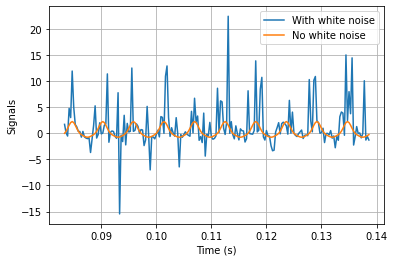

In [9]:
# 添加白噪声
rng = np.random.default_rng()
# 三阶多项式放大器建模
dispol=np.array([0.5,0.75,1,0])

ns=np.arange(300,500)
ts=ns/fs
ys=np.sin(2*np.pi*f0*ts)
noise=rng.normal(size=ts.shape)
ys_n=ys+noise
out=np.poly1d(dispol)

plt.plot(ts,out(ys_n),label='With white noise')
plt.plot(ts,out(ys),label='No white noise')
plt.xlabel('Time (s)')
plt.ylabel('Signals')
plt.grid()
plt.legend()
plt.show

用于signal.pwelch计算和绘制输出的功率谱密度。

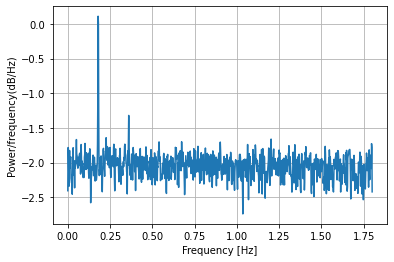

In [13]:
import math
noises=rng.normal(size=t.shape)
y_n=y+noises
f,pxx=signal.welch(out(y_n),fs,nperseg=2048)
Pxx=[]
for i in range(0,len(pxx)):
    C = math.log10(pxx[i])
    Pxx.append(C)
plt.plot(f/1000, Pxx)
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/frequency(dB/Hz)')
plt.show()

由于放大器引入了三阶失真，输出信号预计具有：

1.DC （零频率）分量；
2.与输入频率相同的基波分量，180 Hz；
3.两个谐波——频率分量是输入频率的两倍和三倍，360 和 540 Hz。

验证输出是否符合三次非线性的预期。

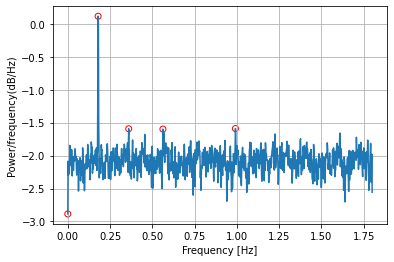

In [19]:
import math
noises=rng.normal(size=t.shape)
y_n=y+noises
f,pxx=signal.welch(out(y_n),fs,nperseg=2048)
Pxx=[]
for i in range(0,len(pxx)):
    C = math.log10(pxx[i])
    Pxx.append(C)

plt.figure()
plt.plot(f/1000, Pxx)
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/frequency(dB/Hz)')
from scipy.signal import find_peaks
Pxx=np.asarray(Pxx)
peaks, _ = find_peaks(Pxx,height=-1.60)
plt.scatter(f[peaks]/1000, Pxx[peaks],c='none',marker='o',edgecolors='r')
plt.scatter(f[0]/1000, Pxx[0],c='none',marker='o',edgecolors='r')

pwelch工作原理是将信号分成重叠的部分，计算每个部分的周期图，然后取平均值。默认情况下，该函数使用 8 个段，重叠率为 50%。对于 10000 个样本，这对应于每段 222 个样本。
将信号分成更短的段会导致更多的平均。周期图更平滑，但分辨率较低。无法区分高次谐波。

Text(0, 0.5, 'Power/frequency(dB/Hz)')

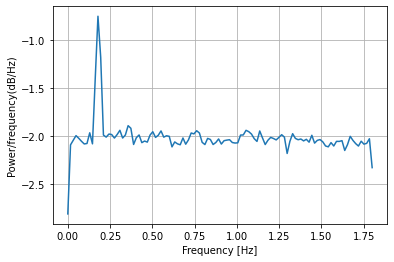

In [20]:
import math
noises=rng.normal(size=t.shape)
y_n=y+noises
f,pxx=signal.welch(out(y_n),fs,nperseg=222)
Pxx=[]
for i in range(0,len(pxx)):
    C = math.log10(pxx[i])
    Pxx.append(C)

plt.figure()
plt.plot(f/1000, Pxx)
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/frequency(dB/Hz)')

将信号分成更长的段会增加分辨率，但也会增加随机性。信号和谐波恰好位于预期位置。然而，至少有一个杂散高频峰值具有比高次谐波更大的功率。

Text(0, 0.5, 'Power/frequency(dB/Hz)')

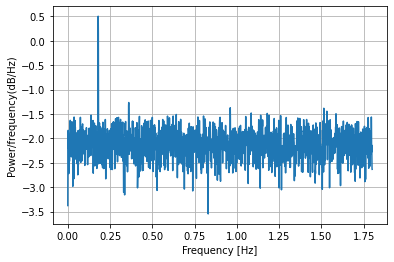

In [21]:
import math
noises=rng.normal(size=t.shape)
y_n=y+noises
f,pxx=signal.welch(out(y_n),fs,nperseg=4444)
Pxx=[]
for i in range(0,len(pxx)):
    C = math.log10(pxx[i])
    Pxx.append(C)

plt.figure()
plt.plot(f/1000, Pxx)
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/frequency(dB/Hz)')